
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitation">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ***no-show dataset***:  collects information from more than 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>
> ScheduledDay => tells us on what day the patient set up their appointment.\
> Neighborhood => indicates the location of the hospital.\
> Scholarship => indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.\
> no-show column => it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Q / What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
#set palette
sns.set_theme(style="darkgrid",palette="pastel")

In [3]:
sns.color_palette()

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

<a id='wrangling'></a>
## Data Wrangling

> **steps**:\
loading the data\
check for missing or duplicated data\
cleaning  dataset for analysis.

In [4]:
#load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [5]:
#make new copy of dataframe and print out a few lines of data
no_show_df = df.copy()
no_show_df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


most of data binary data

In [6]:
#data size
no_show_df.shape

(110527, 14)

In [7]:
#inspect basic information of data
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


no missing values

In [8]:
#some statistics about data
no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


detect issue in age equal -1 

In [9]:
# check duplicated values
no_show_df.duplicated().sum()

0

no duplicated rows

In [10]:
#inspect unique values in each column
no_show_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

AppointmentID is unique values for all rows

In [11]:
#inspect columns labels
no_show_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

#### Data Cleaning
rename columns\
replace values\
Convert binary variables to yes&no\
change data types of AppointmentDay and ScheduledDay

In [12]:
# rename columns make it more readable
no_show_df.rename(columns={'Hipertension': 'Hypertension','Handcap':'Handicap','No-show':'Show_up',
                           'PatientId':'Patient Id','AppointmentID':'Appointment ID',
                           'ScheduledDay':'Scheduled date','AppointmentDay':'Appointment_date'},inplace=True)

In [13]:
no_show_df.rename(columns=lambda name: name.strip().lower().replace(" ", "_"), inplace=True)

In [14]:
#check columns after rename
no_show_df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_date',
       'appointment_date', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show_up'],
      dtype='object')

In [15]:
#set appointment_id as index
no_show_df.set_index('appointment_id',inplace=True)

In [16]:
#inspect duplicated rows again
no_show_df.duplicated(keep='first').sum()

618

In [17]:
#remove duplicated rows
no_show_df.drop_duplicates(inplace=True)

In [18]:
#check duplicated after drop
no_show_df.duplicated(keep='first').sum()

0

In [19]:
#reset index and drop appointment id
no_show_df.reset_index(drop=True,inplace=True)

In [20]:
#change datat types to proper type
no_show_df = no_show_df.astype({'scheduled_date': 'datetime64' , 'appointment_date': 'datetime64','patient_id' : 'str'})

In [21]:
#create new column for lead time
no_show_df['lead_time'] = no_show_df['appointment_date'].dt.date - no_show_df['scheduled_date'].dt.date

In [22]:
#replace values
no_show_df.replace({'gender':{'M':'Male','F':'Female'},'show_up':{'No':'Yes','Yes':'No'},
                  'scholarship':{0:'No', 1:'Yes'},'hypertension':{0:'No', 1:'Yes'},'diabetes':{0:'No', 1:'Yes'},
                   'alcoholism':{0:'No', 1:'Yes'},'handicap':{0:'No', 1:'Yes',2:'Yes',3:'Yes',4:'Yes'},'sms_received':{0:'No', 1:'Yes'}},inplace=True)

In [23]:
#check data after cleaning
no_show_df.head(3)

,patient_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up,lead_time
0,29872499824296.0,Female,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes,0 days
1,558997776694438.0,Male,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes,0 days
2,4262962299951.0,Female,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes,0 days


In [24]:
# check data types
no_show_df.dtypes

patient_id                   object
gender                       object
scheduled_date       datetime64[ns]
appointment_date     datetime64[ns]
age                           int64
neighbourhood                object
scholarship                  object
hypertension                 object
diabetes                     object
alcoholism                   object
handicap                     object
sms_received                 object
show_up                      object
lead_time           timedelta64[ns]
dtype: object

In [25]:
# drop rows where age equal or less than 0
under_age = no_show_df.query('age  < 0').index
no_show_df.drop(under_age,inplace=True)

In [26]:
#some statistic values
no_show_df.describe(datetime_is_numeric=True)

,scheduled_date,appointment_date,age,lead_time
count,109908,109908,109908.000000,109908
mean,2016-05-09 08:43:22.336099072,2016-05-19 01:12:43.707828224,37.086818,10 days 03:45:14.051752374
min,2015-11-10 07:13:56,2016-04-29 00:00:00,0.000000,-6 days +00:00:00
25%,2016-04-29 10:40:41.750000128,2016-05-09 00:00:00,18.000000,0 days 00:00:00
50%,2016-05-10 12:25:20.500000,2016-05-18 00:00:00,37.000000,4 days 00:00:00
75%,2016-05-20 11:40:45.750000128,2016-05-31 00:00:00,55.000000,15 days 00:00:00
max,2016-06-08 20:07:23,2016-06-08 00:00:00,115.000000,179 days 00:00:00
std,NaN,NaN,23.121310,15 days 06:01:13.440115754


scheduled_date range from 2015-11-10 to 2016-06-08\
appointment_date range from 2016-04-29 to 2016-06-08\
outlier in lead time. 

<a id='eda'></a>
## Exploratory Data Analysis

### Q\ what is percentage of patient who no show up?

In [27]:
show_up_plot = no_show_df['show_up'].value_counts(normalize=True)
show_up_plot

Yes    0.798877
No     0.201123
Name: show_up, dtype: float64

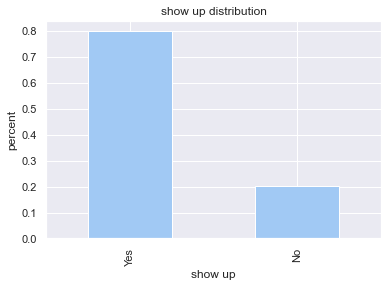

In [28]:
show_up_plot.plot(kind='bar',title='show up distribution',ylabel='percent',xlabel='show up');

20 % of patient no show up 

### Q\ what is insights in every variable and its relation with show up?

In [29]:
def plot_bar(col_name,main_col='show_up',df=no_show_df,**kwargs):
    '''function to plot bar to found relation between two variable'''
    fig, ax =plt.subplots(1,2,figsize=(12,4))
    data_plot = df[col_name].value_counts(normalize=True)
    data_plot.plot(kind='bar',rot=0,ax=ax[0]);
    ax[0].set_title('{} distribution'.format(col_name))
    ax[0].set_ylabel('percent')
    ax[0].set_xlabel(col_name)
    xplot = sns.countplot(x=main_col,hue=col_name,data=df,ax=ax[1],**kwargs)
    ax[1].set_title('{} and show up relation.'.format(col_name))
    ax[1].set_ylabel('count')
    ax[1].set_xlabel(main_col)

In [30]:
no_show_df.groupby('gender')['show_up'].value_counts(normalize=True)

gender  show_up
Female  Yes        0.797572
        No         0.202428
Male    Yes        0.801299
        No         0.198701
Name: show_up, dtype: float64

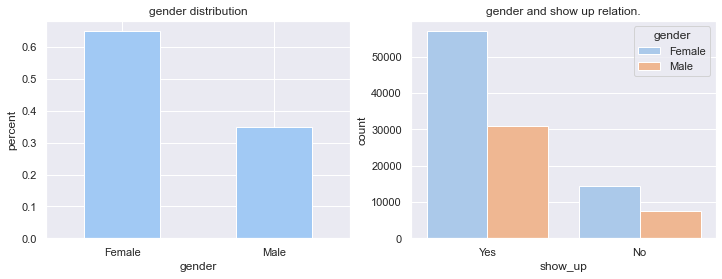

In [31]:
plot_bar('gender')

In [32]:
no_show_df.groupby('scholarship')['show_up'].value_counts(normalize=True)

scholarship  show_up
No           Yes        0.802757
             No         0.197243
Yes          Yes        0.763285
             No         0.236715
Name: show_up, dtype: float64

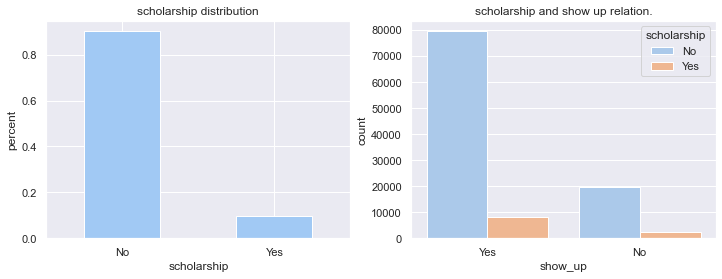

In [33]:
plot_bar('scholarship')

In [34]:
no_show_df.groupby('hypertension')['show_up'].value_counts(normalize=True)

hypertension  show_up
No            Yes        0.791738
              No         0.208262
Yes           Yes        0.827936
              No         0.172064
Name: show_up, dtype: float64

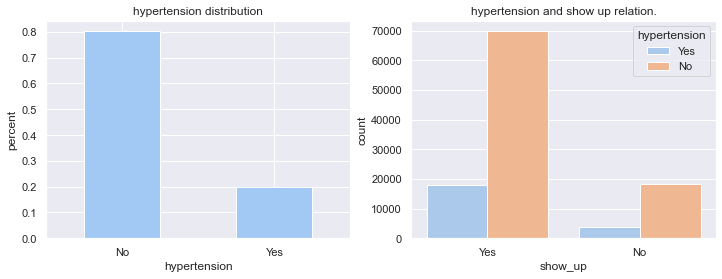

In [35]:
plot_bar('hypertension')

In [36]:
no_show_df.groupby('diabetes')['show_up'].value_counts(normalize=True)

diabetes  show_up
No        Yes        0.797255
          No         0.202745
Yes       Yes        0.819840
          No         0.180160
Name: show_up, dtype: float64

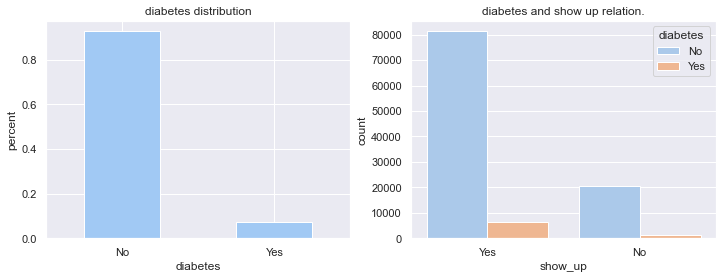

In [37]:
plot_bar('diabetes')

In [38]:
no_show_df.groupby('alcoholism')['show_up'].value_counts(normalize=True)

alcoholism  show_up
No          Yes        0.798835
            No         0.201165
Yes         Yes        0.800239
            No         0.199761
Name: show_up, dtype: float64

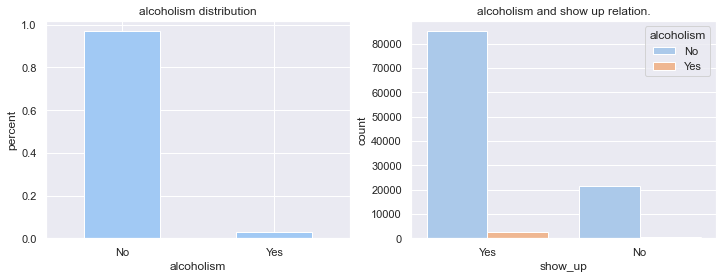

In [39]:
plot_bar('alcoholism')

In [40]:
no_show_df.groupby('handicap')['show_up'].value_counts(normalize=True)

handicap  show_up
No        Yes        0.798438
          No         0.201562
Yes       Yes        0.820189
          No         0.179811
Name: show_up, dtype: float64

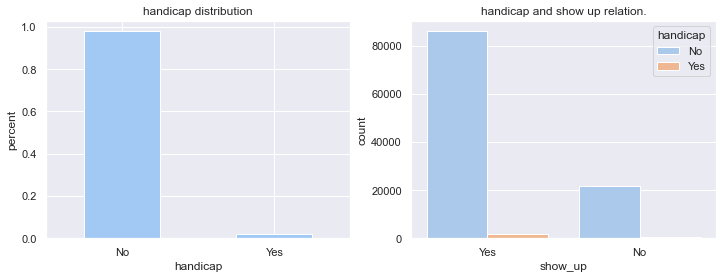

In [41]:
plot_bar('handicap')

2% of patients are handicapped

no significant relation between patient show up and gender,hypertension,diabetes,handicap,schlorship and alcoholism

In [42]:
no_show_df.groupby('sms_received')['show_up'].value_counts(normalize=True)

sms_received  show_up
No            Yes        0.834453
              No         0.165547
Yes           Yes        0.724255
              No         0.275745
Name: show_up, dtype: float64

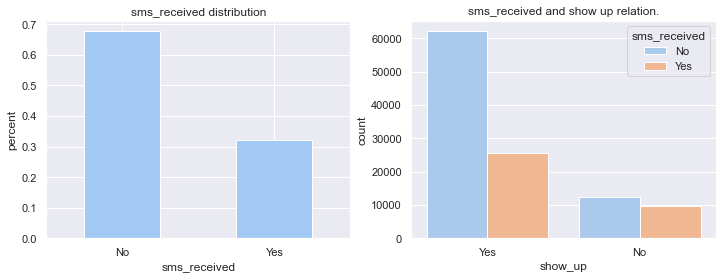

In [43]:
plot_bar('sms_received')

only 32% of patient recieve sms\
it seem that patient not recievied sms little more show up!

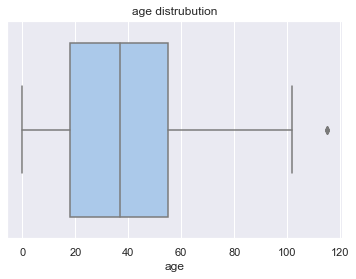

In [44]:
sns.boxplot(x="age", data=no_show_df,orient="h");
plt.title('age distrubution');

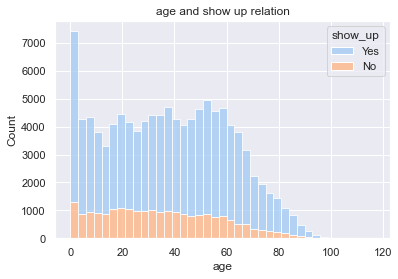

In [45]:
sns.histplot(no_show_df,x='age',hue='show_up',common_norm=True,binwidth=3,multiple="stack");
plt.title('age and show up relation');

some outlier age = 115

#### divide age to catergories

In [46]:
# Bin edges that will be used to "cut" the age data into groups
bin_edges = [1 ,19 ,38 , 56 , 115] 

In [47]:
# Labels for the four age stage groups
bin_names = [ 'young','adulthood' ,'middle age' ,'old' ] # Name each age stage category

In [48]:
# Creates age_stages column
no_show_df['age_stages'] = pd.cut(no_show_df['age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
no_show_df.head()

,patient_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up,lead_time,age_stages
0,29872499824296.0,Female,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes,0 days,old
1,558997776694438.0,Male,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes,0 days,middle age
2,4262962299951.0,Female,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes,0 days,old
3,867951213174.0,Female,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes,0 days,young
4,8841186448183.0,Female,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes,0 days,middle age


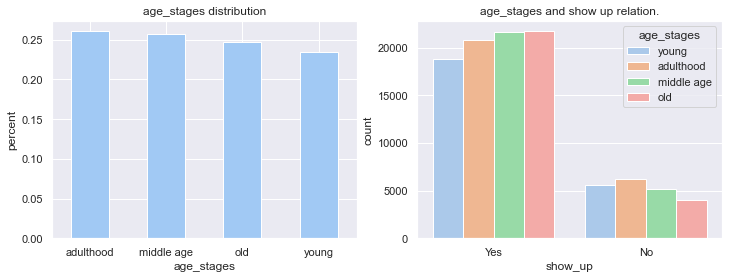

In [49]:
plot_bar('age_stages',hue_order=bin_names)

it seem that older patient little more appointment show up

### Q/ does neighbourhood affect show up ?

In [50]:
neighbourhood_data = no_show_df.groupby('neighbourhood')['show_up'].value_counts(normalize=True)
neighbourhood_data

neighbourhood    show_up
AEROPORTO        Yes        0.875000
                 No         0.125000
ANDORINHAS       Yes        0.773473
                 No         0.226527
ANTÔNIO HONÓRIO  Yes        0.815498
                              ...   
TABUAZEIRO       No         0.181876
UNIVERSITÁRIO    Yes        0.789474
                 No         0.210526
VILA RUBIM       Yes        0.834313
                 No         0.165687
Name: show_up, Length: 160, dtype: float64

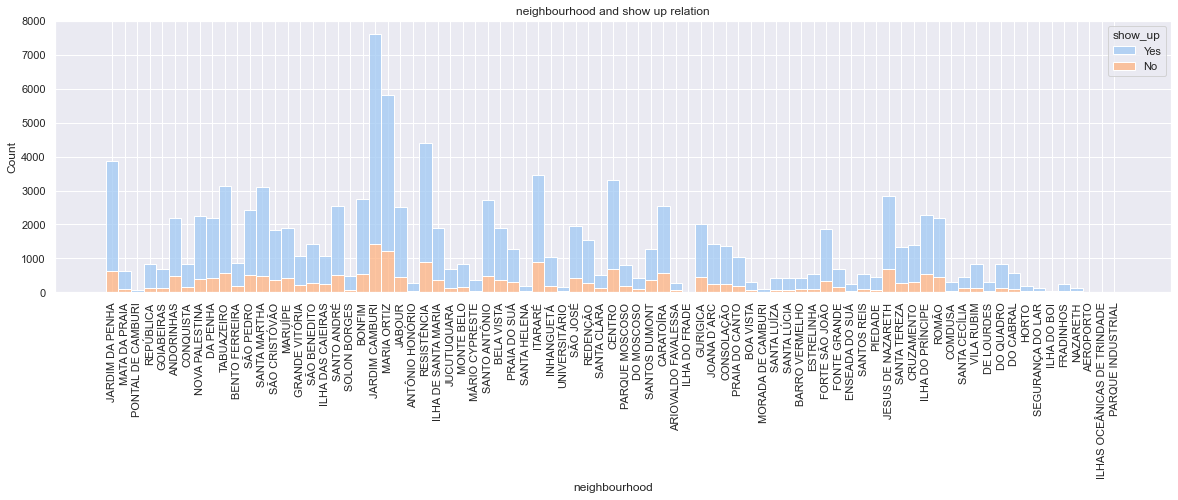

In [51]:
#plotting distribution of neighbourhood  and show up relation
plt.figure(figsize=(20, 5))
sns.histplot(no_show_df,x='neighbourhood',hue='show_up',common_norm=True,binwidth=5,multiple="stack");
plt.xticks(rotation=90);
plt.title('neighbourhood and show up relation')
plt.show()

In [52]:
def plot_hist(col_name,main_col='show_up',df=no_show_df,**kwargs):
    '''function to plot histogram
    parameters
    col_name => string
    main_col => string 'show_up'by defult
    df => data no_show_df by defult'''
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df,x=col_name,hue=main_col,common_norm=True,binwidth=5,multiple="stack");
    plt.xticks(rotation=45)

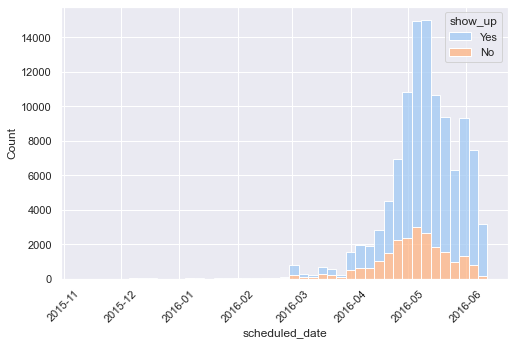

In [53]:
#plotting distribution of scheduled date and show up relation
plot_hist('scheduled_date')

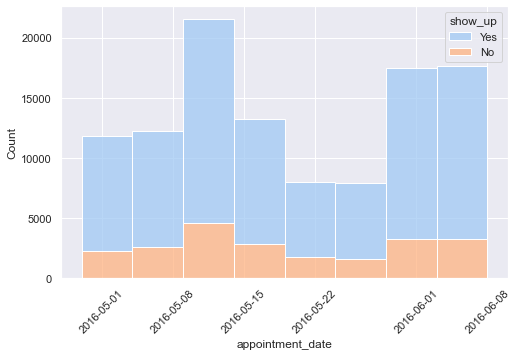

In [54]:
#plotting distribution of appointment date and show up relation
plot_hist('appointment_date')

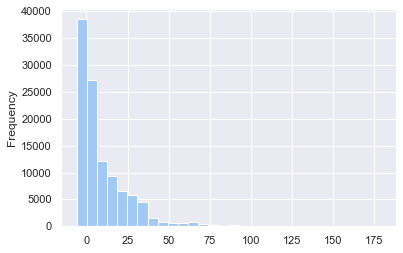

In [55]:
#change timedelta to days of lead time
#plotting distribution of lead time
no_show_df['lead_time'] = no_show_df['lead_time'].astype('timedelta64[D]')
no_show_df['lead_time'].plot.hist(bins=30,xlabel='lead time');

<a id='conclusions'></a>
## conclusions

*There is no significant difference in the distribution of gender, hypertension, diabetes, handicap, scholarship,\
alcoholism and patient show up or not\
*there is little difference in the distribution of age and patient show up\
*high percentage of patients who receive SMS and no show-up,\
so must ask about when SMS is sent?

<a id='Limitation'></a>
#### Limitation:
there are some limitations in this data\
*categorical data can not strongly correlated\
*most of the data is binary data